In [7]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 4.2 MB/s 
     |████████████████████████████████| 232 kB 24.5 MB/s 
     |████████████████████████████████| 51 kB 9.6 MB/s 
     |████████████████████████████████| 4.2 MB 70.9 MB/s 
     |████████████████████████████████| 1.2 MB 55.2 MB/s 
     |████████████████████████████████| 86 kB 7.2 MB/s 
     |████████████████████████████████| 596 kB 63.2 MB/s 
     |████████████████████████████████| 6.6 MB 48.2 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=9194cdb8161a6d71adb91b1fbf61ffe9a24c8e35ac79de85363e9b6d4e616fa3
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=a5345350c3024cea6fd9b5f41d50da9289f2e00e0c884ddd9c26af8a340f8e38
  S

In [8]:
import pandas as pd
import networkx as nx
import csv
from keybert import KeyBERT

In [10]:

df = pd.read_csv('/content/topicModelingData.csv', error_bad_lines=False, engine="python")

Skipping line 122433: unexpected end of data


In [80]:
# get important words
vaccine_terms = 'shot|vaccine|vacine|vacines|vaccines|vaccinate|vaccination|vaccinations|vaccinated|vaccinating|vaxxed|vaxx|vax|\
unvaccinated|unvaxxed|antivaxx|antivaccination|anti|\
moderna|pfizer|j&j|immune|immunize|immunizes|immunized|immunization|immunizations|covid-19|covid|covidvaccination|covid19|covid19vaccination'
vaccine_terms_list = vaccine_terms.split('|')

L = []
for i in range(20):
    corpus = list(df[df['community'] == i]['text'])
    doc = ' '.join(corpus)
    querywords = doc.split()
    resultwords  = [word for word in querywords if word.lower() not in vaccine_terms_list]
    result = ' '.join(resultwords)

    kw_model = KeyBERT()
    L.append(kw_model.extract_keywords(result, keyphrase_ngram_range=(1, 1), stop_words=None))

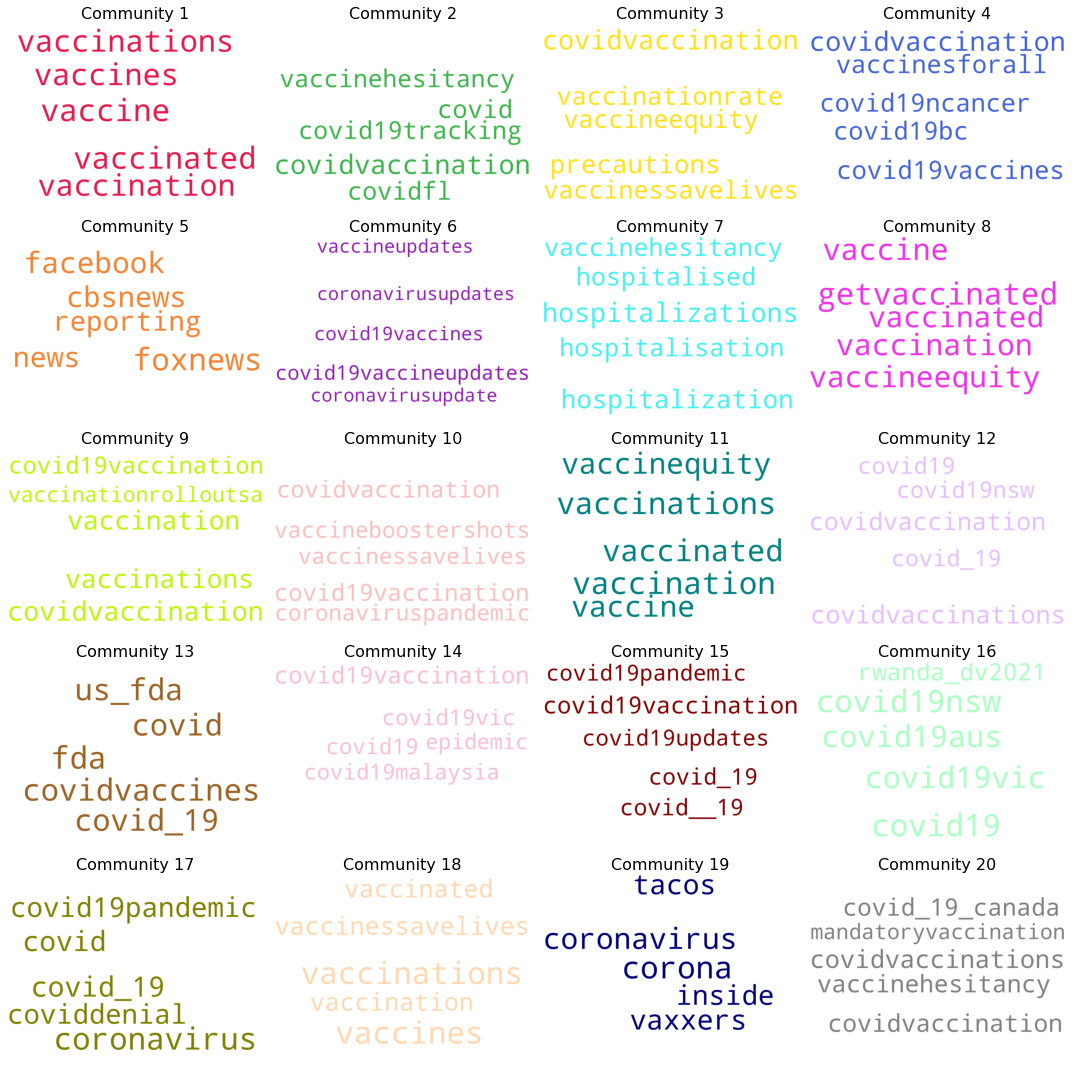

In [98]:
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', 
        '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fabed4', '#800000', '#aaffc3', 
        '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
        
cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


fig, axes = plt.subplots(5, 4, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    bag = pd.DataFrame(L[i], columns=['words', 'counts'])
    d = {}
    for a, x in bag.values:
      d[a] = x

    fig.add_subplot(ax)
    cloud.generate_from_frequencies(d, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Community ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('TwitterKeyword.png')

In [70]:
# reddit by topSubReddit
vaccine_terms = 'shot|vaccine|vacine|vacines|vaccines|vaccinate|vaccination|vaccinations|vaccinated|vaccinating|vaxxed|vaxx|vax|\
unvaccinated|unvaxxed|antivaxx|antivaccination|anti|\
moderna|pfizer|j&j|immune|immunize|immunizes|immunized|immunization|immunizations|covid-19|covid|covidvaccination|covid19|covid19vaccination'
vaccine_terms_list = vaccine_terms.split('|')

df2 = pd.read_csv('/content/reddit_data.csv')
comms = ['trueantivaccination', 'vaccines', 'covidvaccine', 'covidvaccinated', 'antivaxxers', 'conspiracy', 'conspiracytheories',
         'conspiracy_commons', 'covid19', 'coronavirus', 'conservative', 'news']

In [91]:
L1 = []
for i in range(12):
    corpus3 = list(df2[df2['Subreddit'] == comms[i]]['Body'])
    doc3 = ' '.join(corpus3)
    querywords3 = doc3.split()
    resultwords3  = [word for word in querywords3 if word.lower() not in vaccine_terms_list]
    result3 = ' '.join(resultwords3)
    querywords3_ = result3.split('_')
    resultwords3_  = [word for word in querywords3_ if word.lower() not in vaccine_terms_list]
    result3_ = ' '.join(resultwords3_)

    kw_model3 = KeyBERT()
    keywords3 = kw_model3.extract_keywords(result3_)
    L1.append(kw_model3.extract_keywords(result3_, keyphrase_ngram_range=(1, 1), stop_words=None))

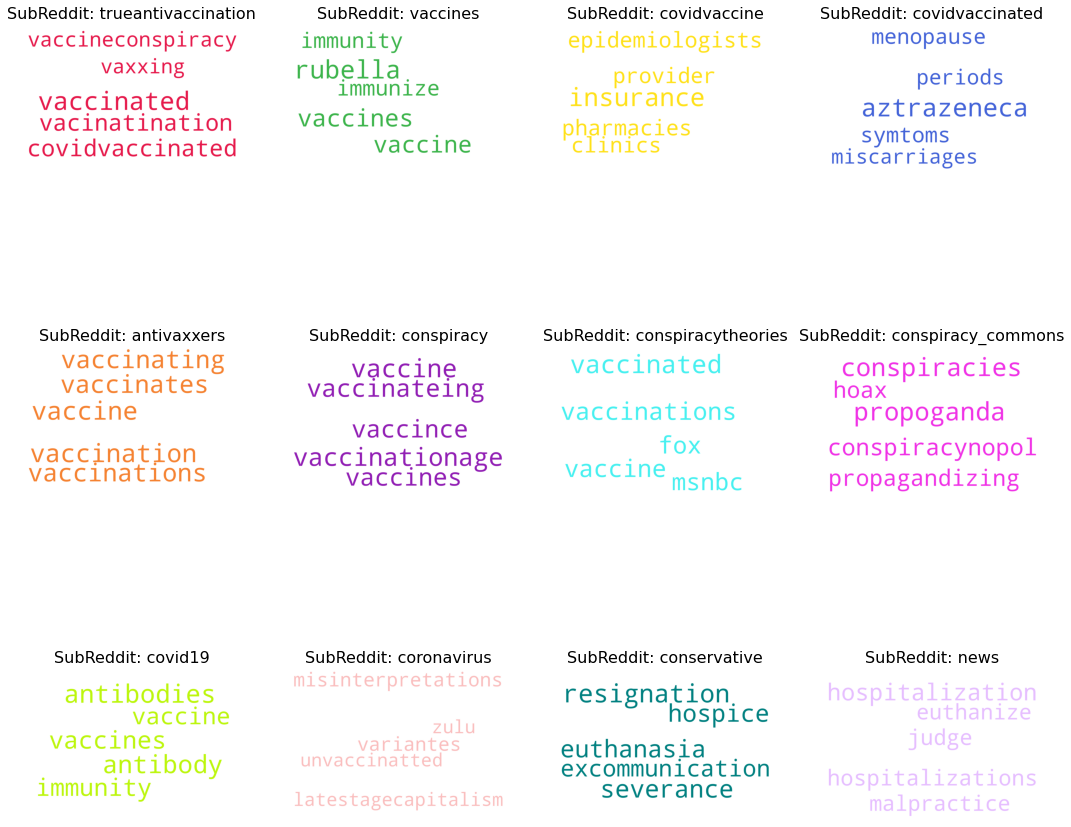

In [99]:
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', 
        '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fabed4']
        
cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


fig, axes = plt.subplots(3, 4, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    bag = pd.DataFrame(L1[i], columns=['words', 'counts'])
    d = {}
    for a, x in bag.values:
      d[a] = x

    fig.add_subplot(ax)
    cloud.generate_from_frequencies(d, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('SubReddit: ' + str(comms[i]), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('RedditKeyword.png')

In [1]:
# LDA model
# https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
stemmer = SnowballStemmer('english')
nltk.download('wordnet')
!pip install PyStemmer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 559 kB 4.9 MB/s 
  Created wheel for PyStemmer: filename=PyStemmer-2.0.1-cp37-cp37m-linux_x86_64.whl size=426035 sha256=2f0382a3454a720ceaf7817e6c8f2ca379c7a7aecc698efcfef159e15420becf
  Stored in directory: /root/.cache/pip/wheels/30/6d/40/0d17a498c5009922dbb3ddaca3d3652387ba94cc96142001f0
Successfully built PyStemmer


In [2]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [12]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

processed_docs = df['text'].map(preprocess)
processed_docs[:10]

0    [ottawa, hospital, queensway, carleton, hospit...
1    [facebook, says, post, cast, doubt, covid, vac...
2    [vaccinated, people, appear, getting, coronavi...
3    [sweet, republican, booster, covid, shot, toda...
4                [beccaturmo, anti, https, hktaeylseq]
5    [university, virginia, disenrolls, students, c...
6    [scientists, blasted, biden, administration, p...
7    [india, reports, covid, cases, recoveries, dea...
8    [looking, edge, trumpism, trump, recommends, c...
9    [months, warning, ivermectin, ineffective, dan...
Name: text, dtype: object

In [13]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 carleton
1 covid
2 hospital
3 hospitals
4 https
5 making
6 mandatory
7 montfort
8 ottawa
9 queensway
10 staff


In [14]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [16]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.32192922388557677),
 (1, 0.5208256746473574),
 (2, 0.22713537136530884),
 (3, 0.17828936209069055),
 (4, 0.20142610331849783),
 (5, 0.32192922388557677),
 (6, 0.30344590401326366),
 (7, 0.32192922388557677),
 (8, 0.21485706258945492),
 (9, 0.3223295971186895),
 (10, 0.09041773547475807),
 (11, 0.20871172061315435)]


In [58]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=12, id2word=dictionary, passes=2, workers=2)

In [59]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.037*"deaths" + 0.037*"vaccine" + 0.031*"florida" + 0.029*"govrondesantis" + 0.024*"cases" + 0.023*"massive" + 0.022*"trump" + 0.019*"record" + 0.017*"alabama" + 0.017*"reporting"
Topic: 1 
Words: 0.034*"shots" + 0.032*"making" + 0.028*"public" + 0.023*"help" + 0.018*"milestone" + 0.016*"source" + 0.015*"vaccinated" + 0.014*"literally" + 0.012*"deaths" + 0.011*"vaccination"
Topic: 2 
Words: 0.113*"risk" + 0.079*"getting" + 0.056*"heart" + 0.024*"floridians" + 0.018*"vaccine" + 0.017*"vaccinated" + 0.015*"dying" + 0.014*"positive" + 0.014*"serve" + 0.014*"monoclonal"
Topic: 3 
Words: 0.079*"vaccine" + 0.053*"grants" + 0.026*"washington" + 0.026*"teachers" + 0.019*"older" + 0.018*"answers" + 0.015*"coronavirus" + 0.014*"vaccination" + 0.013*"vaccinated" + 0.012*"door"
Topic: 4 
Words: 0.074*"vaccines" + 0.055*"mean" + 0.042*"nails" + 0.033*"want" + 0.031*"coronavirus" + 0.030*"think" + 0.030*"women" + 0.029*"declined" + 0.028*"educate" + 0.025*"know"
Topic: 5 
Words: 0.

In [60]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, re.findall('"([^"]*)"', topic)))

Topic: 0 
Words: ['deaths', 'vaccine', 'florida', 'govrondesantis', 'cases', 'massive', 'trump', 'record', 'alabama', 'reporting']
Topic: 1 
Words: ['shots', 'making', 'public', 'help', 'milestone', 'source', 'vaccinated', 'literally', 'deaths', 'vaccination']
Topic: 2 
Words: ['risk', 'getting', 'heart', 'floridians', 'vaccine', 'vaccinated', 'dying', 'positive', 'serve', 'monoclonal']
Topic: 3 
Words: ['vaccine', 'grants', 'washington', 'teachers', 'older', 'answers', 'coronavirus', 'vaccination', 'vaccinated', 'door']
Topic: 4 
Words: ['vaccines', 'mean', 'nails', 'want', 'coronavirus', 'think', 'women', 'declined', 'educate', 'know']
Topic: 5 
Words: ['approved', 'individuals', 'disease', 'ioqsxxv', 'older', 'vaccine', 'today', 'drug', 'vaccines', 'food']
Topic: 6 
Words: ['process', 'lengthy', 'federal', 'source', 'people', 'unvaccinated', 'vaccine', 'vaccinated', 'vaccines', 'radio']
Topic: 7 
Words: ['years', 'prevention', 'vaccine', 'medical', 'approve', 'chief', 'according', '

In [21]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=12, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.121*"nails" + 0.066*"vaccines" + 0.065*"confidence" + 0.021*"think" + 0.021*"regulators" + 0.020*"women" + 0.019*"corona" + 0.019*"mean" + 0.019*"want" + 0.019*"little"
Topic: 1 Word: 0.040*"dogs" + 0.039*"rescue" + 0.037*"shot" + 0.034*"restrictions" + 0.028*"dead" + 0.025*"council" + 0.022*"trump" + 0.021*"rally" + 0.021*"crowd" + 0.020*"alabama"
Topic: 2 Word: 0.014*"vaccinated" + 0.011*"encourage" + 0.010*"mandates" + 0.009*"gets" + 0.009*"york" + 0.009*"distancing" + 0.009*"social" + 0.008*"cases" + 0.008*"total" + 0.008*"wear"
Topic: 3 Word: 0.017*"moderna" + 0.014*"shots" + 0.013*"took" + 0.012*"chief" + 0.012*"trials" + 0.012*"ahead" + 0.012*"completed" + 0.012*"financial" + 0.012*"plan" + 0.012*"answers"
Topic: 4 Word: 0.027*"biontech" + 0.010*"approved" + 0.010*"subject" + 0.010*"replacing" + 0.008*"vaccine" + 0.008*"going" + 0.008*"violate" + 0.008*"likely" + 0.007*"emergency" + 0.007*"vaccines"
Topic: 5 Word: 0.075*"regulators" + 0.057*"washington" + 0.056*

In [22]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, re.findall('"([^"]*)"', topic)))

Topic: 0 Word: ['nails', 'vaccines', 'confidence', 'think', 'regulators', 'women', 'corona', 'mean', 'want', 'little']
Topic: 1 Word: ['dogs', 'rescue', 'shot', 'restrictions', 'dead', 'council', 'trump', 'rally', 'crowd', 'alabama']
Topic: 2 Word: ['vaccinated', 'encourage', 'mandates', 'gets', 'york', 'distancing', 'social', 'cases', 'total', 'wear']
Topic: 3 Word: ['moderna', 'shots', 'took', 'chief', 'trials', 'ahead', 'completed', 'financial', 'plan', 'answers']
Topic: 4 Word: ['biontech', 'approved', 'subject', 'replacing', 'vaccine', 'going', 'violate', 'likely', 'emergency', 'vaccines']
Topic: 5 Word: ['regulators', 'washington', 'official', 'granted', 'process', 'source', 'making', 'news', 'according', 'federal']
Topic: 6 Word: ['ioqsxxv', 'prevention', 'older', 'individuals', 'disease', 'approved', 'years', 'today', 'vaccine', 'biontech']
Topic: 7 Word: ['approval', 'pfizer', 'breaking', 'grants', 'vaccine', 'huge', 'familiar', 'monday', 'aiming', 'federal']
Topic: 8 Word: ['

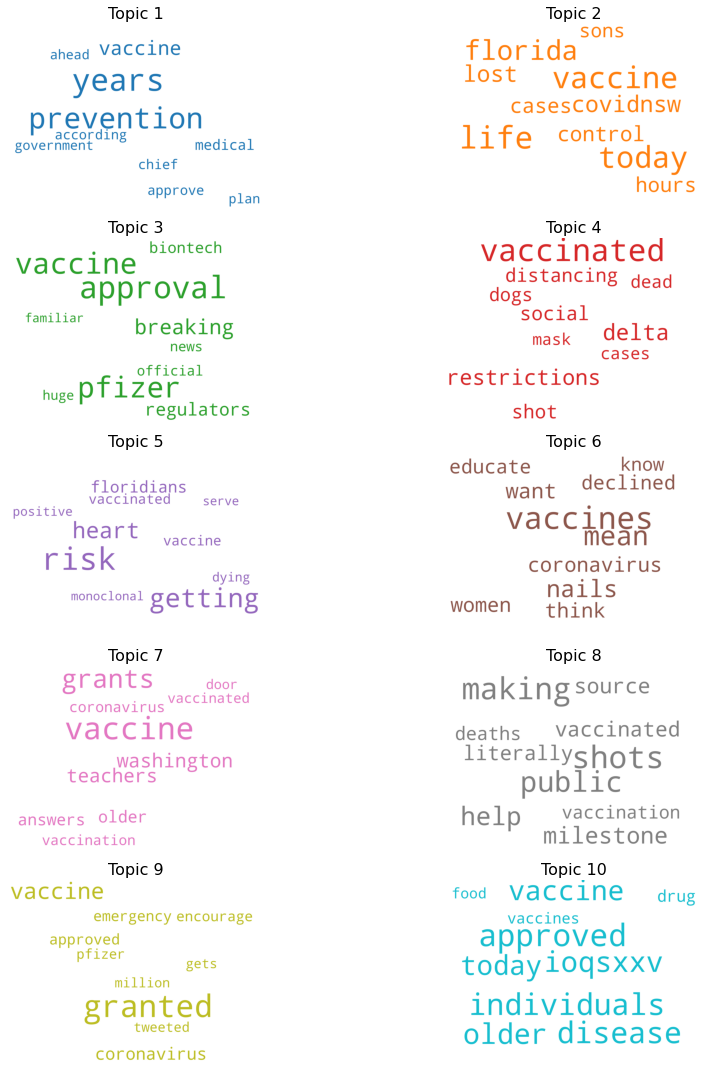

In [96]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('TwitterLDA.png')

In [51]:
# reddit
df2 = pd.read_csv('/content/reddit_data.csv')
processed_docs2 = df2['Body'].map(preprocess)
processed_docs2[:10]

0                                              [chair]
1    [cumstains, evil, scists, experimented, like, ...
2                             [grasping, straws, aren]
3    [inquiring, minds, want, know, vaxxed, school,...
4    [change, tune, inquiry, students, come, forwar...
5                                                   []
6                    [stumble, fall, vaccine, happens]
7    [appreciate, support, hoping, look, kick, tryi...
8    [actually, great, idea, free, physical, heart,...
9    [yeah, needed, medical, evaluation, separate, ...
Name: Body, dtype: object

In [52]:
dictionary2 = gensim.corpora.Dictionary(processed_docs2)
count = 0
for k, v in dictionary2.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 chair
1 beagles
2 cumstains
3 evil
4 experimented
5 like
6 scists
7 spread
8 word
9 worst
10 aren


In [53]:
dictionary2.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus2 = [dictionary2.doc2bow(doc) for doc in processed_docs2]

In [54]:
from gensim import corpora, models
tfidf2 = models.TfidfModel(bow_corpus2)
corpus_tfidf2 = tfidf2[bow_corpus2]
from pprint import pprint
for doc in corpus_tfidf2:
    pprint(doc)
    break

[(0, 1.0)]


In [72]:
lda_model2 = gensim.models.LdaMulticore(bow_corpus2, num_topics=12, id2word=dictionary2, passes=2, workers=2)

In [74]:
for idx, topic in lda_model2.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.089*"https" + 0.047*"reddit" + 0.035*"coronavirus" + 0.033*"information" + 0.030*"message" + 0.028*"comments" + 0.025*"removed" + 0.024*"comment" + 0.023*"article" + 0.023*"post"
Topic: 1 
Words: 0.038*"people" + 0.031*"anti" + 0.013*"world" + 0.012*"want" + 0.011*"think" + 0.010*"like" + 0.009*"fucking" + 0.009*"vaccine" + 0.007*"vaxxers" + 0.007*"going"
Topic: 2 
Words: 0.021*"like" + 0.010*"science" + 0.009*"right" + 0.009*"political" + 0.008*"media" + 0.008*"people" + 0.008*"trump" + 0.007*"republican" + 0.007*"religious" + 0.007*"trust"
Topic: 3 
Words: 0.020*"right" + 0.018*"people" + 0.014*"going" + 0.013*"like" + 0.010*"money" + 0.009*"yeah" + 0.009*"police" + 0.008*"freedom" + 0.007*"good" + 0.007*"know"
Topic: 4 
Words: 0.021*"like" + 0.018*"shot" + 0.013*"time" + 0.012*"year" + 0.012*"months" + 0.011*"going" + 0.010*"good" + 0.009*"getting" + 0.009*"weeks" + 0.009*"days"
Topic: 5 
Words: 0.013*"like" + 0.012*"china" + 0.012*"great" + 0.010*"party" + 0.010*

In [75]:
for idx, topic in lda_model2.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, re.findall('"([^"]*)"', topic)))

Topic: 0 
Words: ['https', 'reddit', 'coronavirus', 'information', 'message', 'comments', 'removed', 'comment', 'article', 'post']
Topic: 1 
Words: ['people', 'anti', 'world', 'want', 'think', 'like', 'fucking', 'vaccine', 'vaxxers', 'going']
Topic: 2 
Words: ['like', 'science', 'right', 'political', 'media', 'people', 'trump', 'republican', 'religious', 'trust']
Topic: 3 
Words: ['right', 'people', 'going', 'like', 'money', 'yeah', 'police', 'freedom', 'good', 'know']
Topic: 4 
Words: ['like', 'shot', 'time', 'year', 'months', 'going', 'good', 'getting', 'weeks', 'days']
Topic: 5 
Words: ['like', 'china', 'great', 'party', 'card', 'cards', 'stupid', 'love', 'thanks', 'thank']
Topic: 6 
Words: ['covid', 'cases', 'vaccinated', 'deaths', 'state', 'florida', 'hospital', 'people', 'hospitals', 'texas']
Topic: 7 
Words: ['vaccine', 'government', 'free', 'approved', 'insurance', 'health', 'companies', 'vaccines', 'approval', 'medical']
Topic: 8 
Words: ['covid', 'test', 'data', 'positive', '

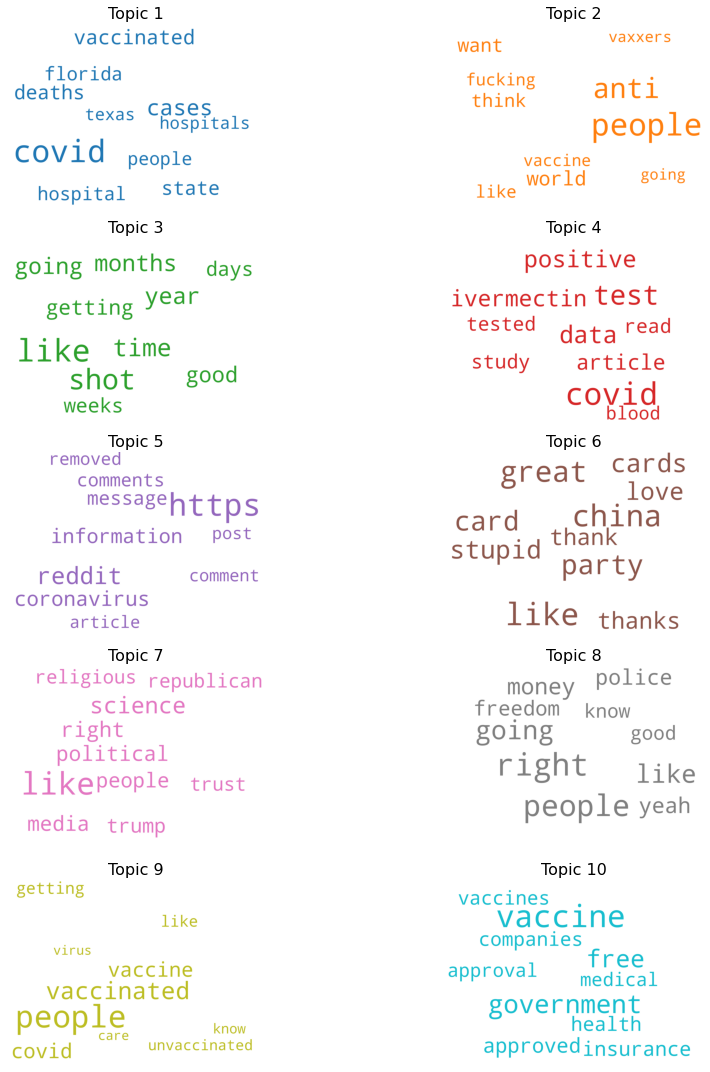

In [95]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics2 = lda_model2.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics2[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('RedditLDA.png')